In [111]:
library('ISLR')

In [112]:
Auto[1:5,]

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
18,8,307,130,3504,12.0,70,1
15,8,350,165,3693,11.5,70,1
18,8,318,150,3436,11.0,70,1
16,8,304,150,3433,12.0,70,1
17,8,302,140,3449,10.5,70,1


# Question 8

In [113]:
lm.fit = lm(mpg~horsepower, data=Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


# Ans (a) 1-3

# Ans (a) 4

In [114]:
lm.predict.conf = predict(lm.fit,data.frame(horsepower=c(98)), interval="confidence")
lm.predict.pred = predict(lm.fit,data.frame(horsepower=c(98)), interval="prediction")

print(lm.predict.conf)
print(lm.predict.pred)

       fit      lwr      upr
1 24.46708 23.97308 24.96108
       fit     lwr      upr
1 24.46708 14.8094 34.12476


# Ans (b)

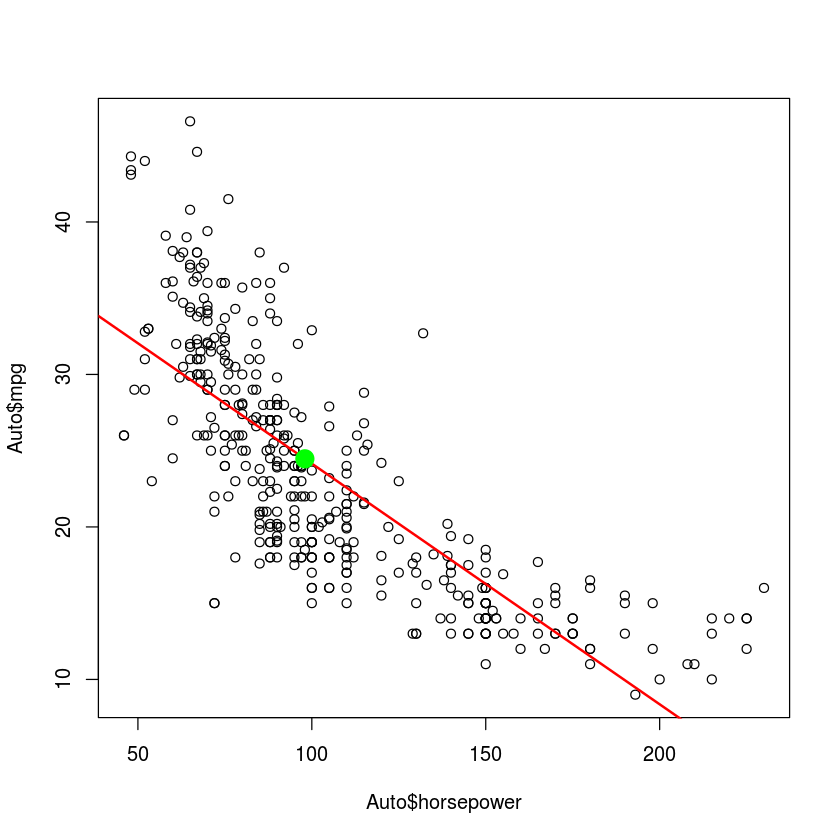

In [115]:
plot(Auto$horsepower, Auto$mpg)
abline(lm.fit, col="red", lwd=2)
points(98,24.46708, col="green", pch=20, cex=3)

# Ans(c)

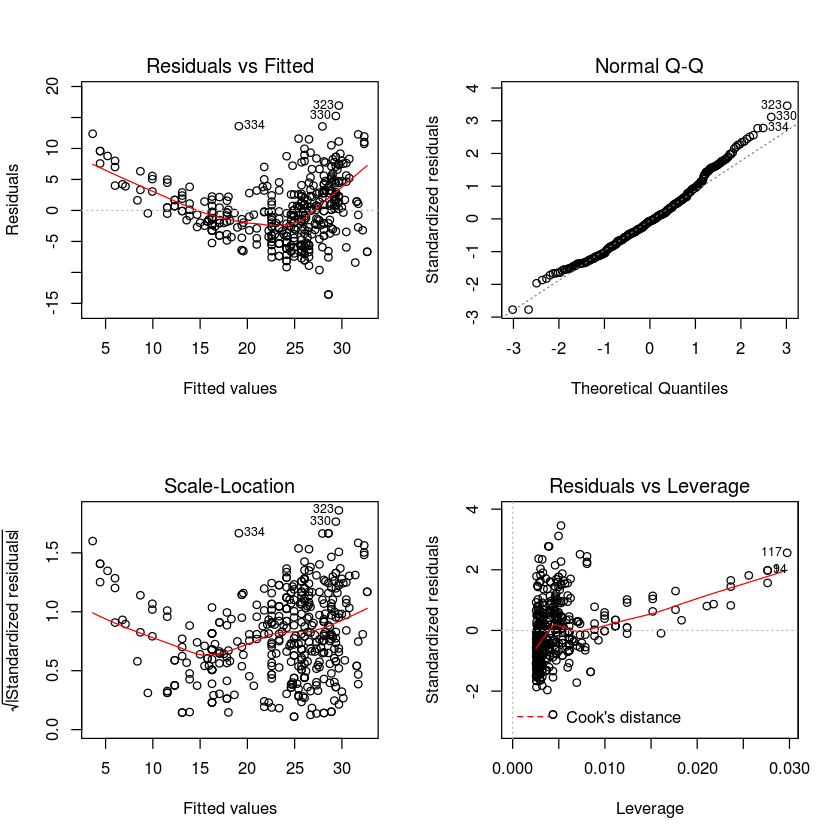

In [116]:
par(mfrow=c(2,2))
plot(lm.fit)

# Question 9

## Ans(a)

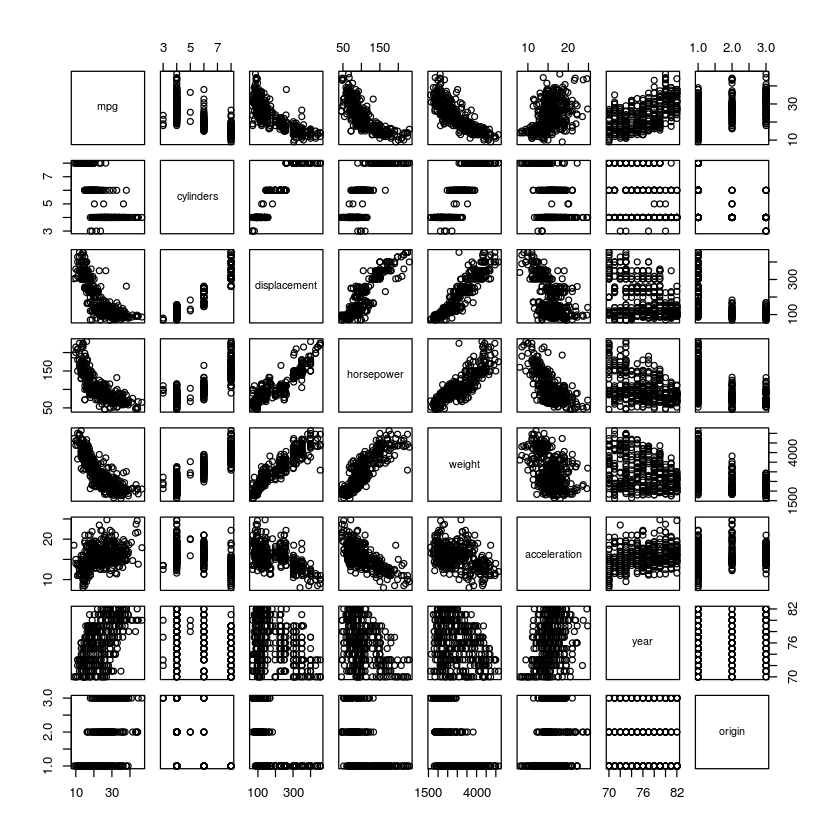

In [117]:
plot(Auto)

## Ans(b)

In [118]:
Auto = Auto[names(Auto)!='name']
cor(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


## Ans(c)

In [119]:
lm.fit = lm(mpg~.,data=Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ ., data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


### Check multicolinearity between predictors

In [129]:
library('car')
vif(lm.fit)

cylinders displacement   horsepower       weight acceleration         year 
   10.737535    21.836792     9.943693    10.831260     2.625806     1.244952 
      origin 
    1.772386

## Ans(d)

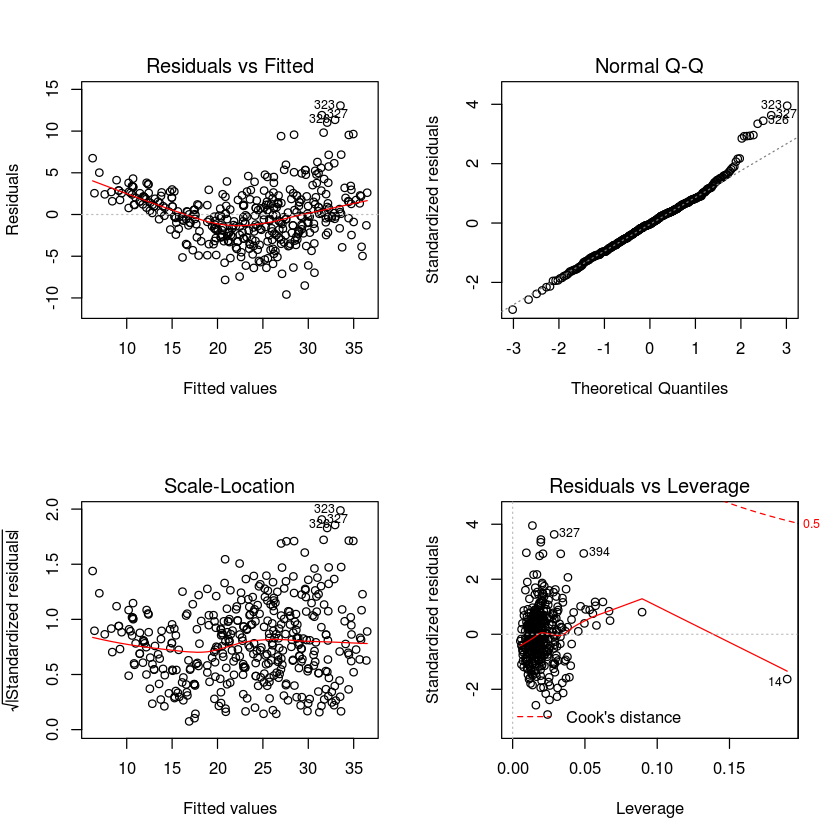

In [120]:
par(mfrow=c(2,2))
plot(lm.fit)

### Identify Outliers using cooks distance

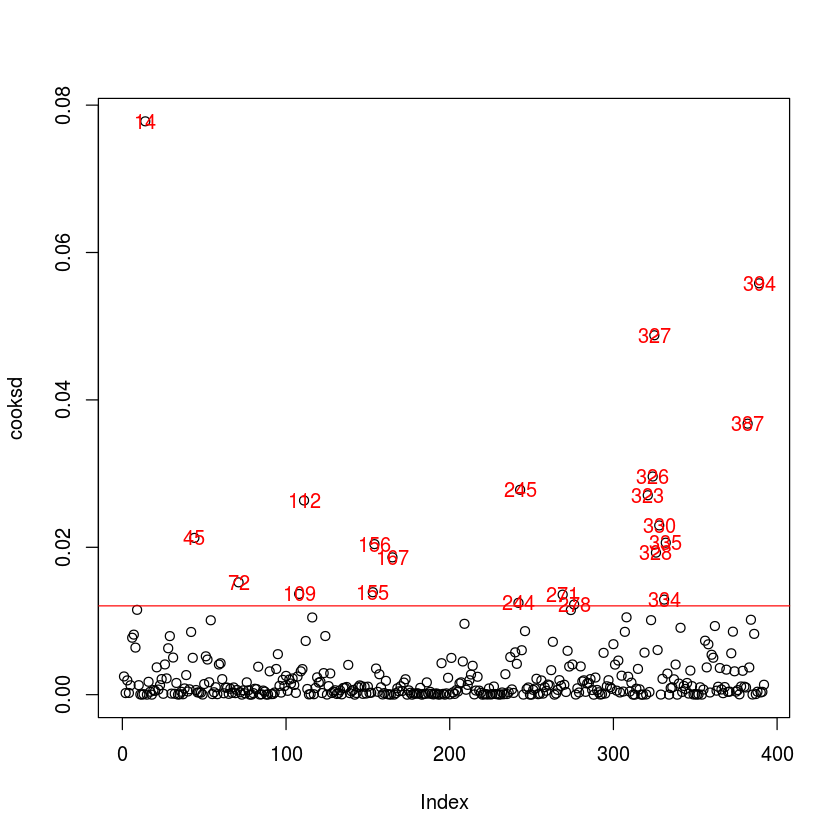

In [121]:
cooksd = cooks.distance(lm.fit)
plot(cooksd)
abline(h=4*mean(cooksd), col="red") # Add cutoff line
text(x=1:length(cooksd), y=cooksd, labels=ifelse(cooksd>4*mean(cooksd),names(cooksd),""), col="red")

### Identify leverage points

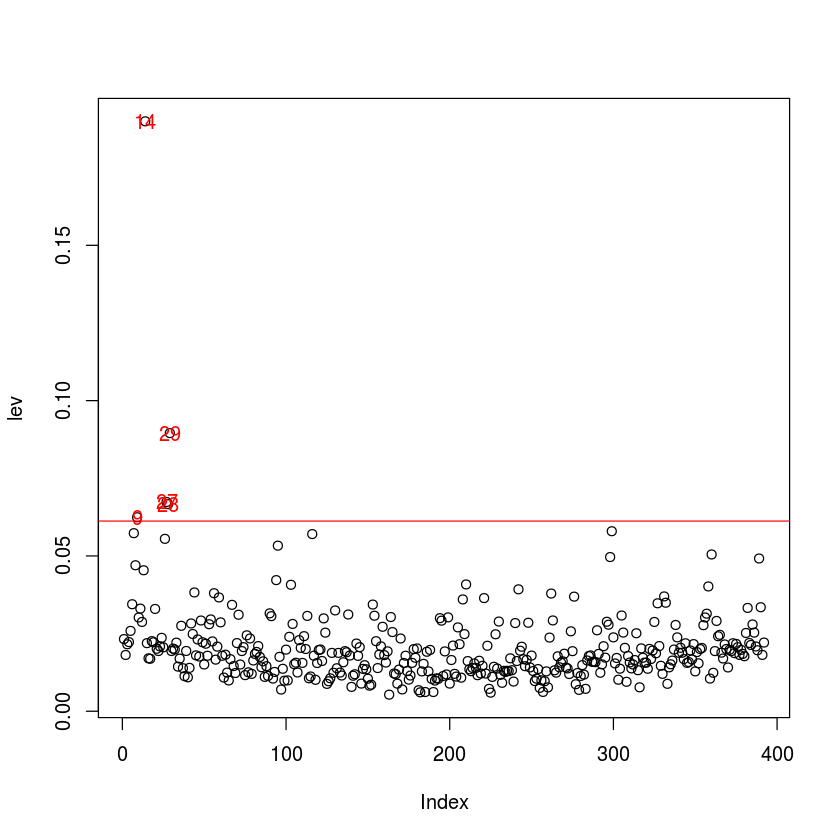

In [122]:
lev.statistics = length(Auto)/nrow(Auto) # (p+1)/n
lev = hatvalues(lm.fit)
plot(lev)
abline(h=3*lev.statistics, col="red")
text(x=1:length(lev),y=lev,labels=ifelse(lev>3*lev.statistics, names(lev),""), col="red")

In [131]:
high_lev = lev[lev>3*lev.statistics]
high_lev
which.max(lev)

9         14         27         28         29 
0.06244917 0.18991289 0.06736993 0.06667349 0.08954137

14 
14

In [124]:
Auto[10:15,]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
10,15,8,390,190,3850,8.5,70,1
11,15,8,383,170,3563,10.0,70,1
12,14,8,340,160,3609,8.0,70,1
13,15,8,400,150,3761,9.5,70,1
14,14,8,455,225,3086,10.0,70,1
15,24,4,113,95,2372,15.0,70,3


## Ans(e)


Call:
lm(formula = mpg ~ . + displacement:weight, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9027 -1.8092 -0.0946  1.5549 12.1687 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -5.389e+00  4.301e+00  -1.253   0.2109    
cylinders            1.175e-01  2.943e-01   0.399   0.6899    
displacement        -6.837e-02  1.104e-02  -6.193 1.52e-09 ***
horsepower          -3.280e-02  1.238e-02  -2.649   0.0084 ** 
weight              -1.064e-02  7.136e-04 -14.915  < 2e-16 ***
acceleration         6.724e-02  8.805e-02   0.764   0.4455    
year                 7.852e-01  4.553e-02  17.246  < 2e-16 ***
origin               5.610e-01  2.622e-01   2.139   0.0331 *  
displacement:weight  2.269e-05  2.257e-06  10.054  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.964 on 383 degrees of freedom
Multiple R-squared:  0.8588,	Adjusted R-squared:  0.8558 
F-statistic: 2

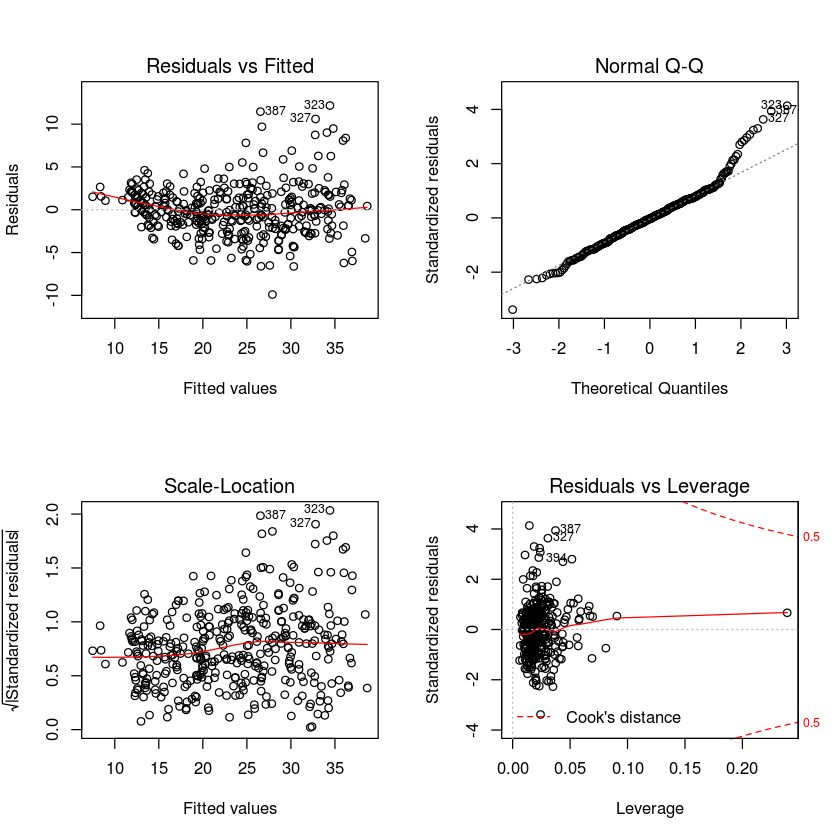

In [130]:
lm.fit1 = lm(mpg~.+displacement:weight, data=Auto)
summary(lm.fit1)

par(mfrow=c(2,2))
plot(lm.fit1)

# Ans(f)


Call:
lm(formula = mpg ~ displacement + I(displacement^2) + weight + 
    displacement * weight + year + origin, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5621  -1.7380  -0.0009   1.5894  12.5663 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -7.719e+00  3.922e+00  -1.968   0.0498 *  
displacement        -6.948e-02  1.135e-02  -6.122 2.28e-09 ***
I(displacement^2)   -1.070e-05  3.569e-05  -0.300   0.7645    
weight              -1.083e-02  1.165e-03  -9.296  < 2e-16 ***
year                 8.191e-01  4.525e-02  18.103  < 2e-16 ***
origin               3.745e-01  2.644e-01   1.416   0.1575    
displacement:weight  2.210e-05  4.169e-06   5.301 1.95e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.019 on 385 degrees of freedom
Multiple R-squared:  0.8526,	Adjusted R-squared:  0.8503 
F-statistic: 371.3 on 6 and 385 DF,  p-value: < 2.2e-16


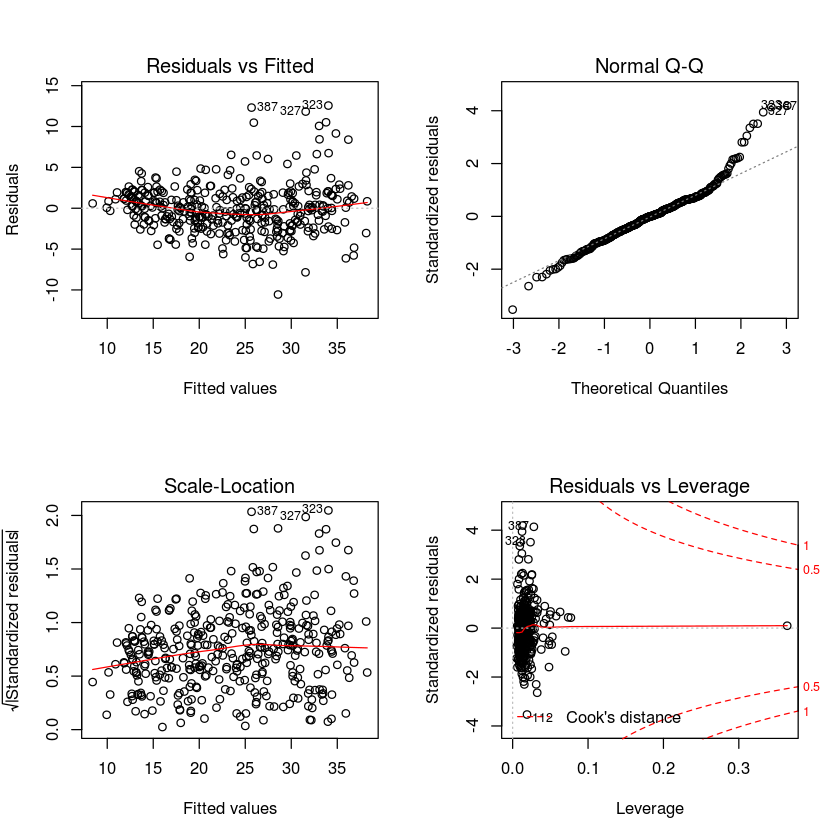

In [126]:
lm.fit2 = lm(mpg~displacement+I(displacement^2)+weight+displacement*weight+year+origin, data=Auto)
summary(lm.fit2)

par(mfrow=c(2,2))
plot(lm.fit2)


Call:
lm(formula = mpg ~ displacement + log(displacement) + weight + 
    year + origin, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.4212  -1.7523   0.0384   1.6371  12.2065 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.447e+01  7.745e+00   4.451 1.12e-05 ***
displacement       5.944e-02  8.184e-03   7.264 2.10e-12 ***
log(displacement) -1.361e+01  1.739e+00  -7.830 4.75e-14 ***
weight            -5.239e-03  5.456e-04  -9.603  < 2e-16 ***
year               8.215e-01  4.677e-02  17.563  < 2e-16 ***
origin             2.628e-01  2.771e-01   0.948    0.343    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.112 on 386 degrees of freedom
Multiple R-squared:  0.843,	Adjusted R-squared:  0.841 
F-statistic: 414.6 on 5 and 386 DF,  p-value: < 2.2e-16


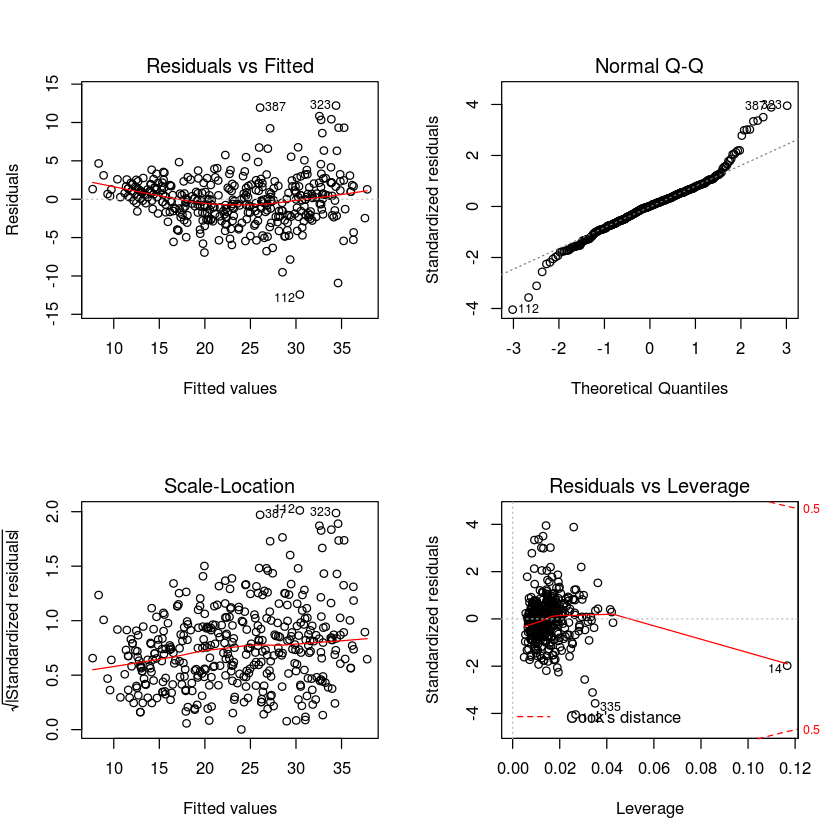

In [127]:
lm.fit3 = lm(mpg~displacement+log(displacement)+weight+year+origin, data=Auto)
summary(lm.fit3)

par(mfrow=c(2,2))
plot(lm.fit3)


Call:
lm(formula = mpg ~ displacement + I(displacement^-2) + weight + 
    year + origin, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.4027  -1.8404   0.0646   1.7295  12.2006 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.761e+01  4.120e+00  -6.701 7.36e-11 ***
displacement        1.218e-02  4.683e-03   2.601  0.00965 ** 
I(displacement^-2)  4.350e+04  7.094e+03   6.131 2.16e-09 ***
weight             -5.591e-03  5.561e-04 -10.054  < 2e-16 ***
year                8.171e-01  4.819e-02  16.954  < 2e-16 ***
origin              5.045e-01  2.810e-01   1.795  0.07338 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.198 on 386 degrees of freedom
Multiple R-squared:  0.8342,	Adjusted R-squared:  0.8321 
F-statistic: 388.5 on 5 and 386 DF,  p-value: < 2.2e-16


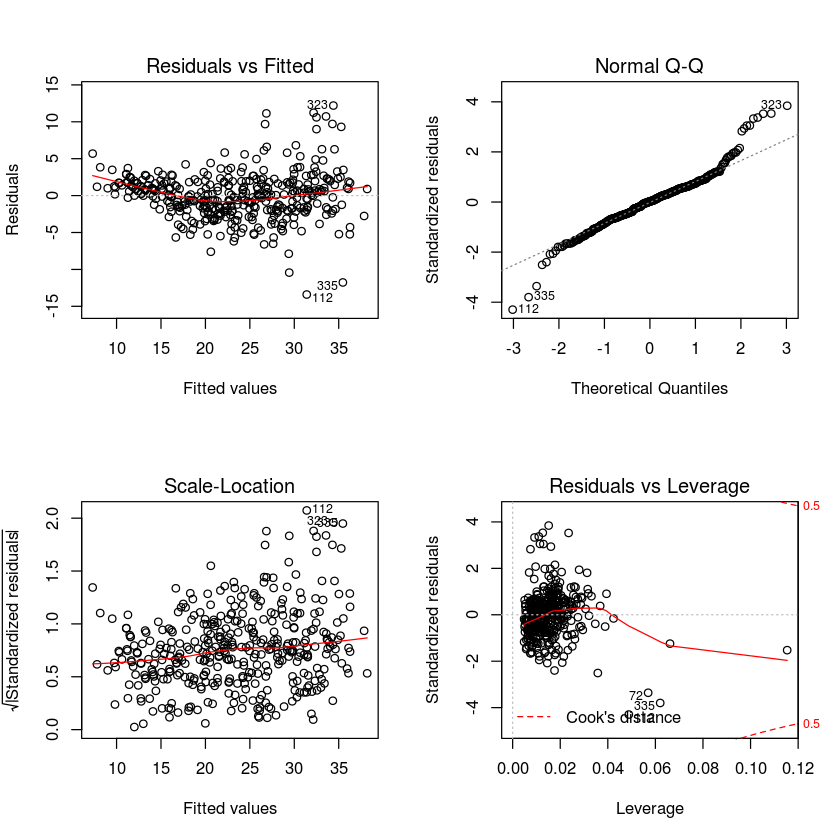

In [128]:
lm.fit4 = lm(mpg~displacement+I(displacement^-2)+weight+year+origin, data=Auto)
summary(lm.fit4)

par(mfrow=c(2,2))
plot(lm.fit4)